# PMR3409 - Controle II
# Lab 2: Sistemas dinâmicos em tempo discreto

### Versão 2025

# Identificação

**Aluno 1 : Giovanni Cangiano**           **NUSP: 10705892**

**Aluno 2 : Edilson Elias Barbosa Guedes Dias**           **NUSP:13726042** 

**Turma de Laboratório: 3**

**Professor: Oswaldo Horikawa**

 ## Instruções para edição das células de resposta

1. O manual do jupyter notebook pode ser encontrado em https://jupyter-notebook.readthedocs.io/en/stable/notebook.html

2. As células do jupyter podem conter código ou texto que utiliza uma linguagem de formatação denominada Markdown.
   O manual do markdown é encontrado em https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html
   
3. Se clicarmos o botão <RUN> numa célula de texto o jupyter realiza a formatação desse texto.
   Se a célula estiver no modo formatado e clicarmos novamente, entra-se no modo de edição do texto.
   
3. As imagens de figuras podem ser inseridas no markdown através de duas maneiras:
- Fazendo referência a um arquivo de um folder. As figuras utilizadas no texto estão dentro do folder ./Figuras
- Fazendo **copy and paste** de uma imagem para uma região desejada da célula de texto. Dessa forma a imagem da figura fica incorporada no arquivo .ipynb. Recomenda-se esse método para a incorporação de imagens geradas pelo matplotlib. Ao final deve ser verificado se todas as figuras estão incorporadas corretamente. O sistema eventualmente utiliza o mesmo label para se referir a cada imagem e isso pode gerar conflito.
    
4. Os símbolos matemáticos e equações utilizam a sintaxe da linguagem de formatação LaTeX.

## Instruções para submissão do relatório

- Arquivo Jupyter Notebook *.ipynb com o seu relatório.
- Diretório contendo todas as figuras do seu relatório (Caso seja necessário!).
- As células contendo código geram gráficos como resposta. Os gráficos devem ser gerados com a opção %matplotlib inline.
- Manter os gráficos gerados pelas células, i.e., não resetar as células de código.
- Arquivo *.html equivalente ao seu arquivo *.ipynb. Menu: File -> Download as -> HTML

## 1- Introdução

No Lab 2 investigaremos técnicas de implementação de sistemas de controle digital. 

## 2. Sistema de controle Digital

O desenvolvimento da teoria de sistemas de tempo discreto está intimamente ligado à área de Análise Numérica especialmente através da aproximação de sistemas dinâmicos de tempo contínuo utilizando equações de diferenças que permitem a simulação ou integração numérica aproximada desses sistemas.

A aplicação prática de sistemas de tempo discreto passa a ter importância a partir dos anos 40/50 com sua utilização inicialmente na área de comunicações e depois na área de controle o que impulsionou o desenvolvimento teórico da Transformada Z.

A aplicação em larga escala de sistemas de controle digital só se tornou realidade a partir dos anos 70 com o desenvolvimento dos microprocessadores e microcontroladores. 

Um sistema de controle digital pode idealmente ser representado através do seguinte diagrama esquemático:

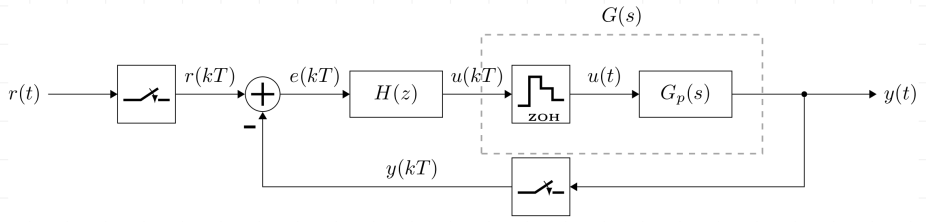

Essa abstração é a utilizada no desenvolvimento da teoria de sistemas de tempo discreto, onde as operações de
amostragem e do Zero Order Hold (Segurador de Ordem Zero) são ideais tanto no aspecto temporal (operações síncronas) quanto em relação aos valores das variáveis (ponto flutuante sem aproximações).

Implementações práticas, no entanto, estão sujeitas a várias restrições tecnológicas. 
Um diagrama esquemático de um sistema de controle digital evidenciando os sub-sistemas
eletrônicos é ilustrado abaixo.

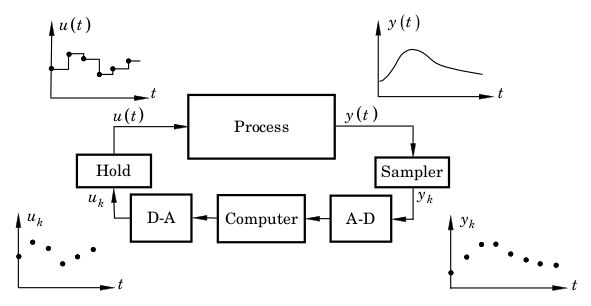

Observamos no sistema de controle digital três elementos básicos:

- **conversor Analógico-Digital (A/D):** realiza a operação de amostragem (Sampler) do sensor analógico que monitora a saída do sistema $y(t)$ transformando o valor de tensão analógica em um número inteiro. O valor inteiro resultante depende do intervalo de quantização e do número de bits que define a resolução do conversor A/D (Veja figura abaixo).  A operação de conversão realiza uma quantização dos valores e consequentemente ocorre uma operação de truncamento. O método de truncamento é dependente do sistema computacional (Hardware e software). Internamente ao computador converte-se o número inteiro resultante em um número do tipo ponto flutuante, dentro intervalo de quantização, armazenando esse valor na variável $y(k)$. Todas as  operações internas ao computador são usualmente realizadas em ponto flutuante$^1$. 

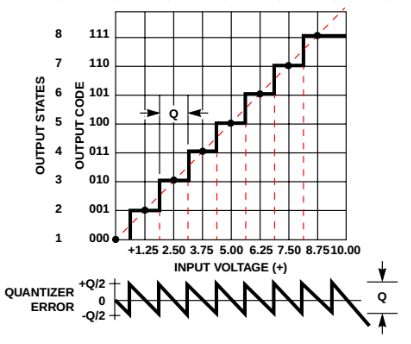
  
- **computador:** calcula o algoritmo de controle. Podemos representar o algoritmo de controle genericamente através de uma representação em espaço de estados de tempo discreto:
              
$$
\begin{align}
x_c(k+1) & = A_c x_c(k)+ B_c e(k)\\
u(k) &= C_c x_c(k)
\end{align}
$$
              
- **conversor Digital-Analógico (D/A):** realiza a operação de conversão do esforço de controle calculado $u(k)$ em um valor analógico $u(t)$. Nessa operação utiliza-se um bloco denominado
   Segurador de Ordem Zero (Hold) que mantem o valor de $u(t)$ constante até a próxima operação de conversão. Aqui também o valor final da tensão analógica sofre uma operação de quantização, ou seja, depende do número de bits e do intervalo de quantização. Os valores $u(k)$ e $u(t)$ podem ser diferentes devido a resolução.
   
Dessa forma, concluímos que um sistema de controle digital tem comportamento híbrido havendo uma parte em tempo discreto e uma parte em tempo contínuo.

**Um outro aspecto bastante importante é que o sistema de controle digital funciona sincronizadamente realizando operações a cada intervalo de tempo $T$ denominado intervalo de amostragem. A escolha do valor de $T$ será um dos temas principais desse curso**

**$^1$: No início os microprocessadores não realizavam operações em ponto flutuante. Operações de ponto flutuante eram sintetizadas por software.**


## 2.1 Quantização das variáveis e do tempo

a-) Para as especificações de conversores Analógico-Digitais (A/D) abaixo calcule a resolução da tensão em Volts equivalente a 1 bit:

|Intervalo de quantização [Volts]|N bits|Ganho|resolução|
|:-|:-|:-|:-|
|[0,+10]|8|1|0.039216|
|[-5,+5]|12|10|0.024420|
|[0,+10]|16|1|0.000153|

b-) Como citado acima, o sistema de controle digital funciona de maneira sincronizada com o intervalo de amostragem $T$. Se ocorrer um distúrbio no sistema provocando uma mudança de $y(t)$ entre duas amostragens delimitadas pelos instantes $t_k=kT$ e $t_{k+1}=(k+1)T$ qual será a reação do controlador ?

**Resposta:**

Caso ocorra um distúrbio entre duas amostragens, que não mantém na leitura da segunda amostra, o controlador não detectará tal distúrbio e, portanto, não atuará no
sistema.

## 2.2 Simulação de um sistema de controle digital - equações discretas e integração numérica

a-) Seja a seguinte função de transferência:

$$ G(s) = \frac{1}{(s+1)} $$
Utilizando o Lugar das Raízes, projete um controlador PI: $$H(s)=K_p \left( 1 + \frac{1}{T_i s}\right)$$
que resulta em pólos complexos conjugados com coeficiente de amortecimento $\zeta=0.7$.
OBS: utilize $T_i=0.5$, Utilizar o código abaixo.

**Resposta:**

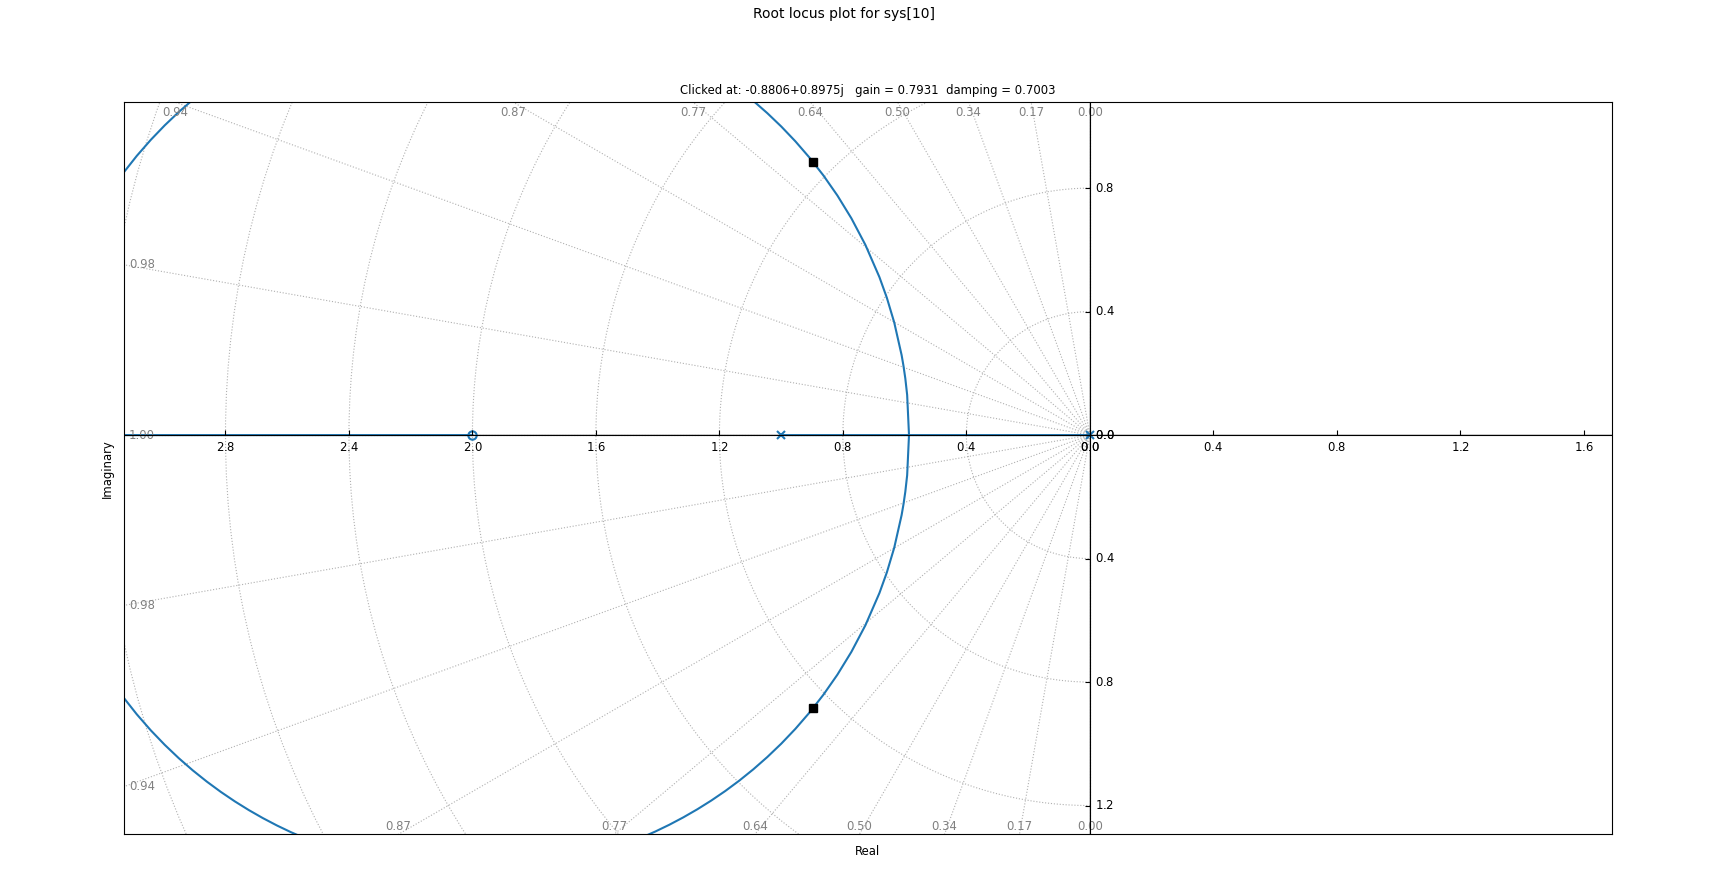

b-) Construa o diagrama de Bode para o sistema de controle em malha fechada utilizando
o controlador obtido no item 1). Obtenha a Largura de Banda $B_w$ em $rad/s$.

**Resposta:**

Ampliando-se o diagrama de Bode plotado, se obtém:

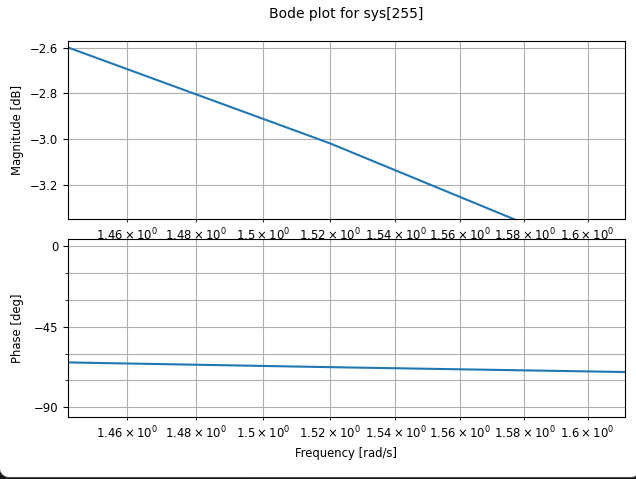

E, portanto, conclui-se que para um ganho de -3dB, a largura de banda é dada por $\omega=1.52 rad/s$


c-) Calcule a frequência de amostragem $f_c=f_{min}$(em $Hz$) a partir da qual podemos considerar que o sistema
de controle em malha fechada contendo elementos discretos pode ser considerado
como equivalente a um sistema contínuo.

**Resposta:**

A frequência mínima para considerar que o sistema de controle em MF pode ser considerado um sistema contínuo é da ordem de:

$f_c=f_{min}=50\times\frac{BW}{2\pi}=50\times\frac{1.52}{2\pi}\approx 12.096Hz$

d-) Simule o sistema de controle em malha fechada utilizando $f_c=f_{min}$ para o controlador
   e intervalo de integração da planta $dt=0.0005$. **OBS: Utilizar o código abaixo.**
   
**Resposta:**


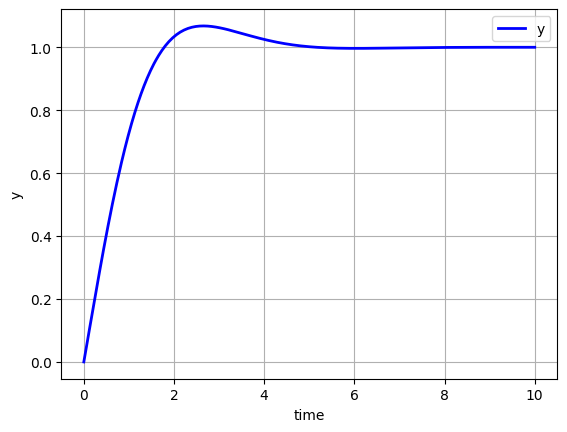
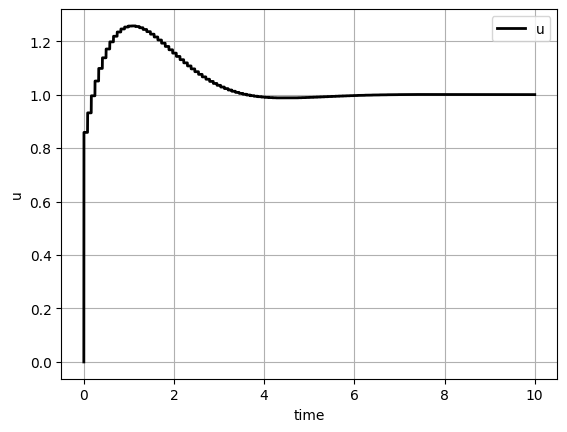

   
e-) Realize simulações com redução gradativa da frequência de amostragem
$f_c$ (Ex: $15Hz$, $5Hz$, $1Hz$) e analise a degradação de desempenho do sistema.

**Resposta:**

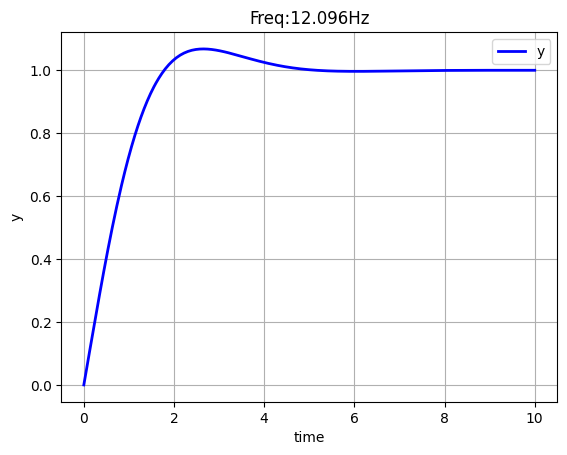
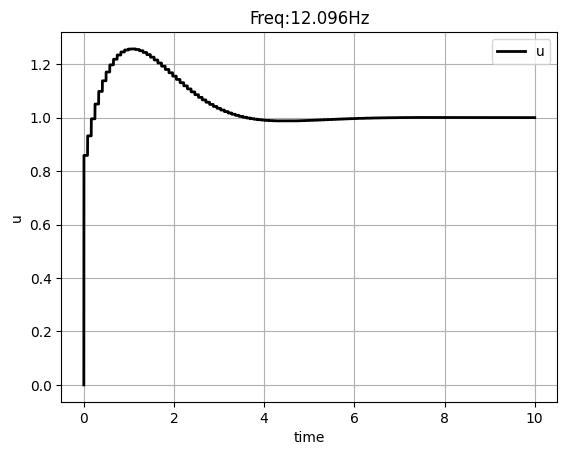


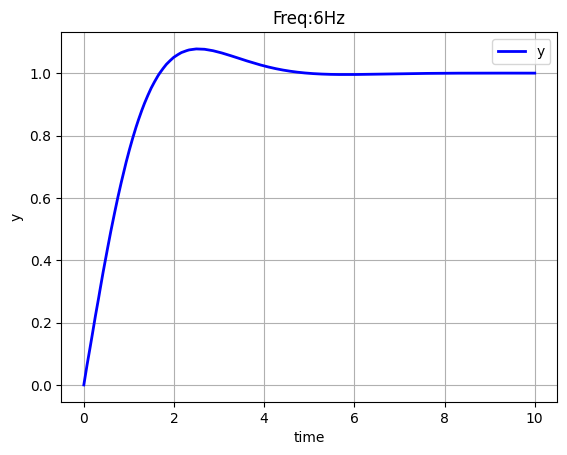
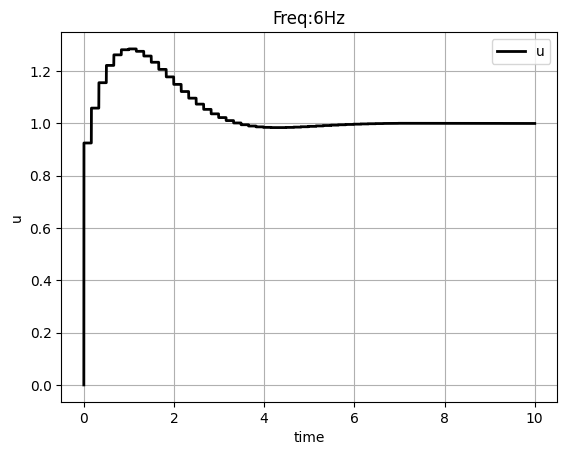


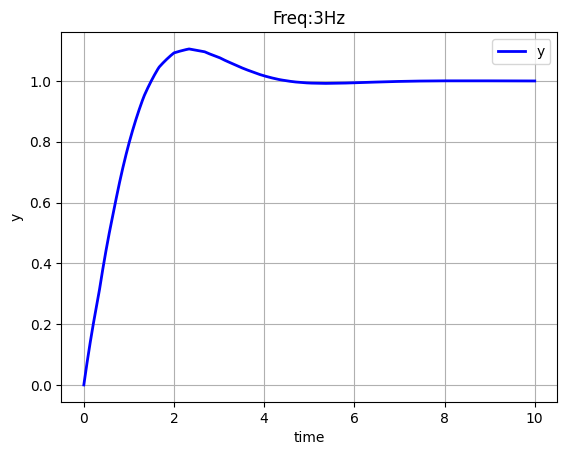
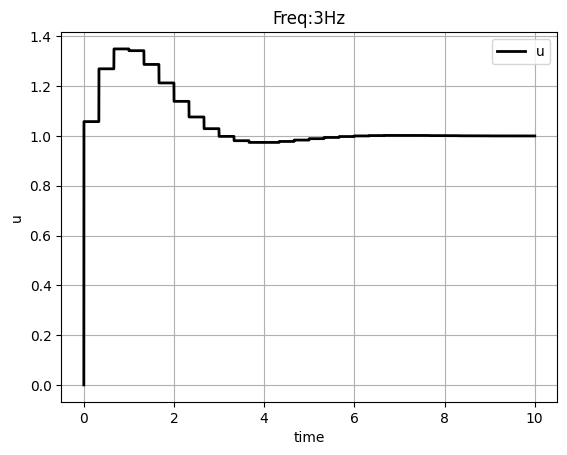


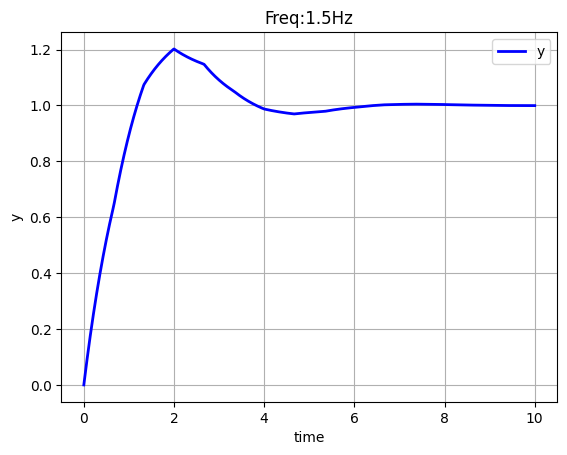
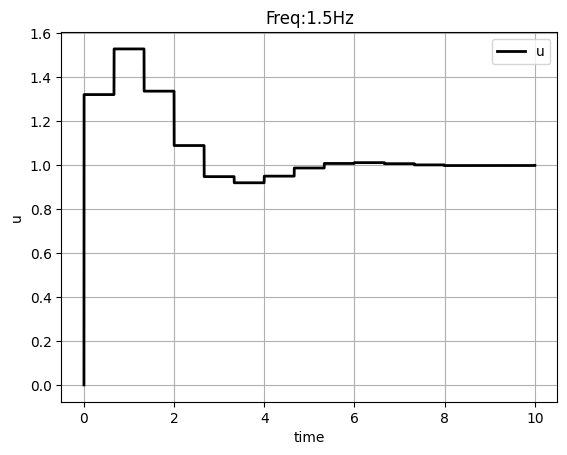

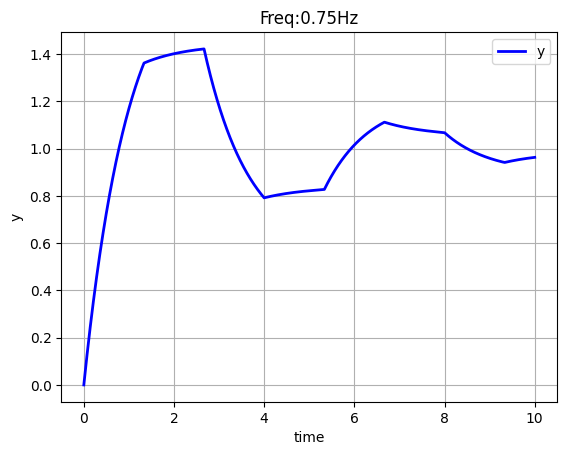
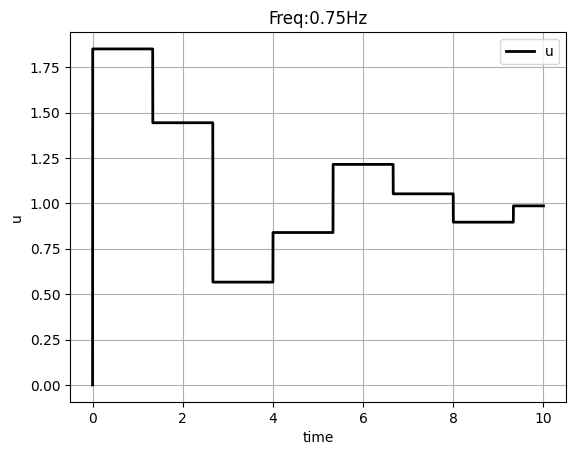




## Determinação da constante $K_p$ do controlador PI

C:\Users\Giovanni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


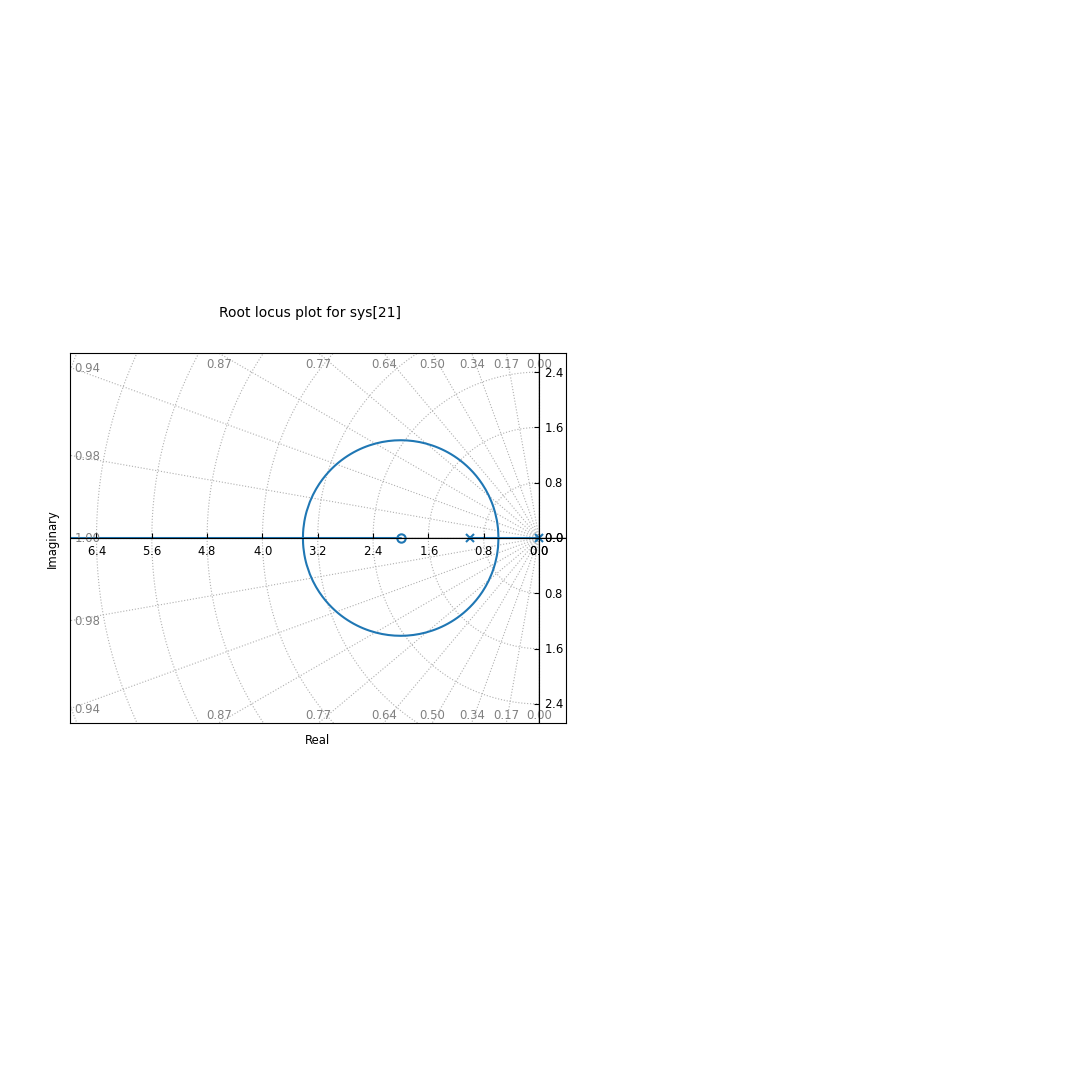

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as co
plt.close('all')
%matplotlib inline
#%matplotlib qt
s=co.tf('s')
G=1/(s+1)
Ti=0.5
H=(1+1/(Ti*s))
openloop=G*H
[rlist,klist]=co.rlocus(openloop,grid=True)

## Código para o Diagrama de Bode - Sistema de controle em malha fechada

-------------
CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA
tempo de subida tr =  1.32 seg
tempo de acomodacao ts =  4.28 seg
maximo sobresinal Mp =  5.807025295338142
valor de pico y =  1.06
instante de pico tp =  2.80 seg
valor de regime estacionario thetaoss =  1.00


C:\Users\Giovanni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


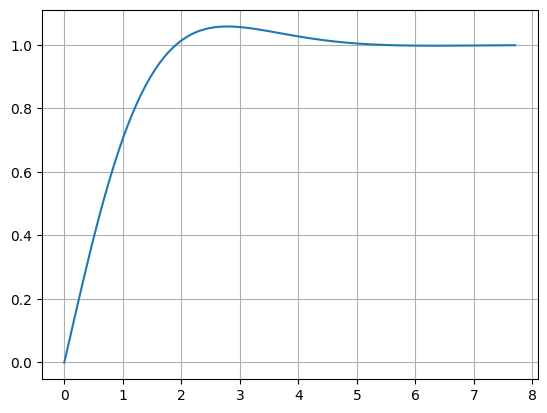

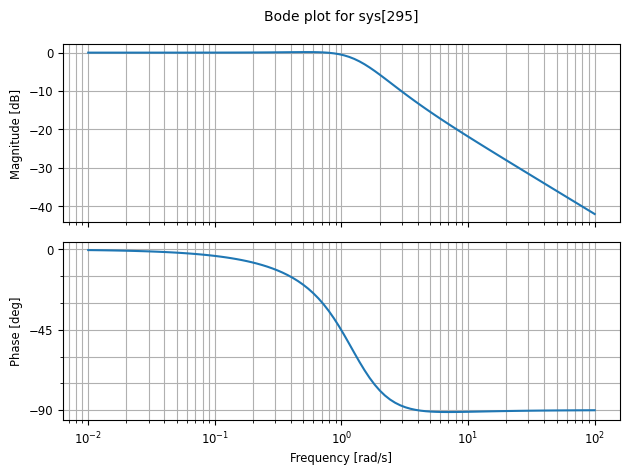

In [16]:
%matplotlib inline
#%matplotlib qt
#Resposta
# Constantes escolhidas Kp=? Ti=?
#
G=1/(s+1)
Ti = 0.5
H=(1+1/(Ti*s))
Kp = 0.7931                # <------------ Parametro de escolha Kp
# malha aberta
openloop=Kp*G*H
# malha fechada
cloop = co.feedback(openloop,1)
# Grandezas 
S=co.stepinfo(cloop)
print('-------------')
print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA')
print('tempo de subida tr = ','%.2f' % S['RiseTime'],'seg')
print('tempo de acomodacao ts = ','%.2f' % S['SettlingTime'],'seg')
print('maximo sobresinal Mp = ',S['Overshoot'])
print('valor de pico y = ','%.2f' % S['Peak'])
print('instante de pico tp = ','%.2f' % S['PeakTime'],'seg')
print('valor de regime estacionario thetaoss = ','%.2f' % S['SteadyStateValue'])
# Grafico da resposta a degrau unitario
y, t = co.step(cloop);
plt.figure(1)
plt.plot(t,y)
plt.grid()
co.bode
plt.figure(2)
omega = np.logspace(-2,2,num=100,base=10);
[mag,phi,w]=co.bode(cloop,omega,dB=True,Hz=False,deg=True)
plt.show()
# bandwidth
# para mag=-3dB --> w= ??? rad/s

## Código para simulação do sistema de controle em  malha fechada

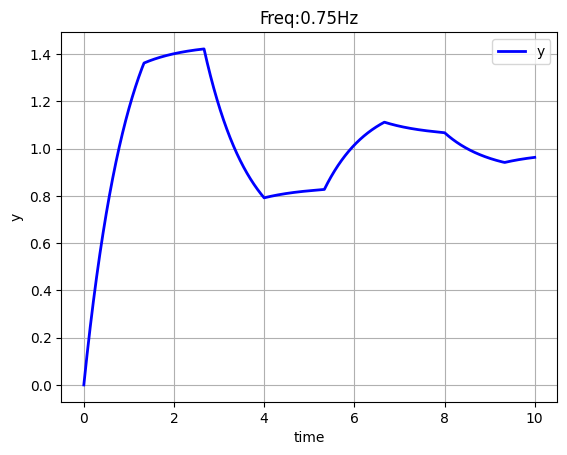

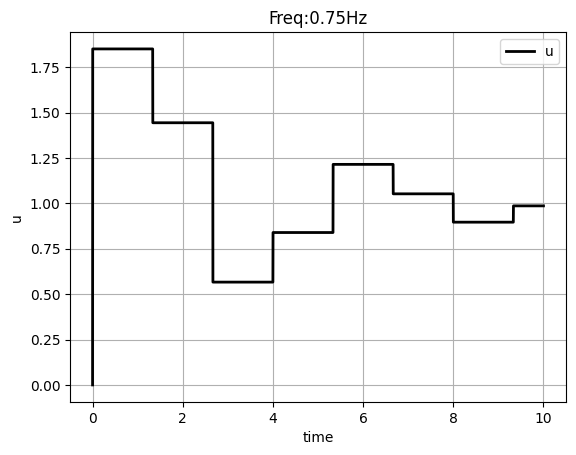

In [37]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import control as co_general
from control.matlab import *
#%matplotlib Qt
# function that returns dx/dt
# dx/dt + x = u
def first_order_model(x,t,u):
    dxdt = -x + u
    return dxdt

# number of time points
n = 10001
#
# Vetor de tempo t utilizado para
# integracao da planta
ti = 0.0
tf = 10.0
t = np.linspace(ti,tf,n)
#
# Passo de integracao utilizado para a integracao da planta
# dt = (tf-ti)/(n-1)
#
# OBS: Nesse caso dt=0.0005
#
u=np.zeros(n) # vetor do sinal de controle
y=np.zeros(n) # vetor de saida da planta
# dt intervalo de integracao da planta
dt = t[1]-t[0]
#
# Escolher aqui a freq de amostragem do controlador
#
fc =0.75# frequencia amostragem [Hz]                      <----------------------------- fc
Tc = 1/fc  # Periodo de amostragem do controlador [seg]
mult = int(Tc/dt)
# mult indica qtos multiplos de dt existem
# em Tc
# o controlador so' e' calculado
# em instantes discretos i que sao multiplos de mult
#
# Escolher aqui os parametros do controlador PI
#
Kp=  0.7931    # <-------------------------------------------- Kp
Ti=  0.5    # <-------------------------------------------- Ti
#
# inicialiazacao de variaveis
#
contador = 0
Ik_menos1 = 0.0
Ek_menos1 = 0.0
Uk = 0.0
#
# vetor de set point
#
ref = np.ones(n) # vetor de 1's, degrau unitario
#
# laco de execucao do sistema de controle em malha fechada
#
# note que i=1...n
# posicoes de indice 0 com condicoes iniciais
for i in range(1,n):
    # define o intervalo de integracao
    tspan = [t[i-1],t[i]]
    # calcula o valor do erro    
    Ek = ref[i]-y[i-1]
    #
    # decide se o controlador PI e' calculado
    # ou nao
    # (contador % mult) fornece o resto da divisao inteira
    # se for 0 indica que e'o momento de calcular o controle
    #
    if ( contador % mult ) == 0:
        Ik = Ik_menos1 + (Kp*Tc/Ti)*(Ek + Ek_menos1)/2 # termo integral definido de forma recursiva
        Pk = Kp * Ek # termo proporcional
        Uk = Pk + Ik # sinal PI
        Ek_menos1 = Ek
        Ik_menos1 = Ik
    # Algoritmo utilizado e' a transformacao bilinear
    # ou Tustin ou integracao trapezoidal desenvolvido no livro do Astrom, Hagglund
    # PID controllers: Theory, Design and Tuning, ISA, 1995
    #
    u[i] = Uk   # sempre armazena o valor de Uk para cada i    
    #
    # Integracao da planta
    #
    y0 = y[i-1] # condicao inicial
    # odeint funcao para integracao numerica
    # executa internamente a funcao first_order_model
    yaux = odeint(first_order_model,y0,tspan,args=(Uk,))
    # yaux e' ma lista de listas ou array
    y[i]=yaux[1][0]
    #
    contador = contador + 1
    # fim do laco principal execucao do sistema de controle em malha fechada
    
# saida y(t)
plt.plot(t,y,'b-',linewidth=2,label='y')
plt.title("Freq:" + str(fc)+"Hz" )
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
# sinal de controle u(t)
plt.plot(t,u,'k-',linewidth=2,label='u')
plt.title("Freq:" + str(fc)+"Hz" )
plt.xlabel('time')
plt.ylabel('u')
plt.legend()
plt.grid()
plt.show()

## 3. Simulação de um sistema de controle digital - Python control system toolbox

Na seção anterior foi realizado a simulação de um sistema de conrole digital através de equações de difereças e integração numérica da planta do sistema.

Nessa seção o mesmo sistema de controle digital será simulado utilizando funções do Python Control System Toolbox para sistemas de tempo discreto.

Incialmente apresenta-se como obter a função de transferẽncia de tempo discreto equivalente a uma função de transferência de tempo contínuo de uma planta a ser controlada.

Seja a função de transferência de um sistema de 1a. ordem:
$$
\frac{Y(s)}{U(s)} = G(s) = \frac{K}{\tau s+1}
$$

A malha de controle digital possui sinais de tempo discreto e de tempo contínuo.
Para efeito de projeto e análise é necessário converter a parte de tempo contínuo para
tempo discreto. Deve ser incorporada à função de transferência da planta a função de
transferência do Segurador de Ordem Zero (ZOH) como observado na figura abaixo.

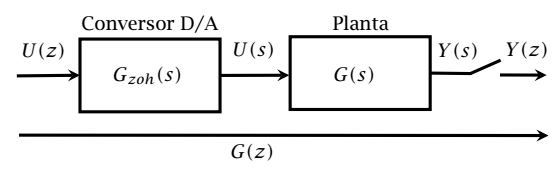

A função de transferência discreta do sistema considerando o segurador de Ordem zero na entrada do sistema pode ser calculada da seguinte forma:
$$
G(z) = (1-z^{-1}) {\cal{L}} \left\{ \frac{G(s)}{s} \right\},
$$
que resulta em:

$$
G(z) = \frac{b_1}{z+a_1} = \frac{b_1z^{-1}}{1+a_1z^{-1}}
$$

onde:
$$
b_1 = (1-\exp\{-\tau/T\}),
$$
e
$$
a_1 = - \exp\{-\tau/T\}.
$$

a-) Realize simulações utilizando os mesmo controlador projetado acima. Utilize as seguintes frequências de 
amostragem $f_c$ (Ex: $15Hz$, $5Hz$, $1Hz$) e analise a degradação de desempenho do sistema.

**Resposta:**

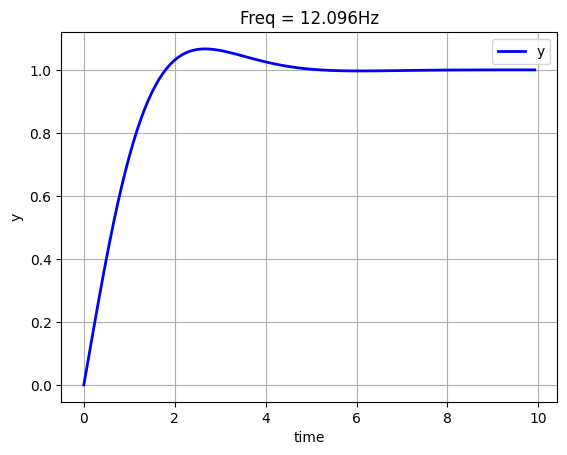
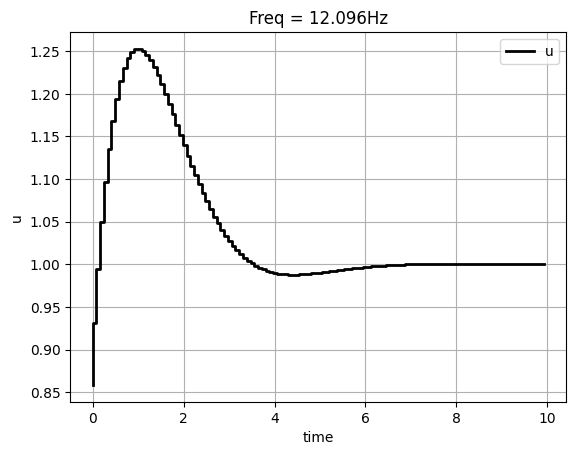

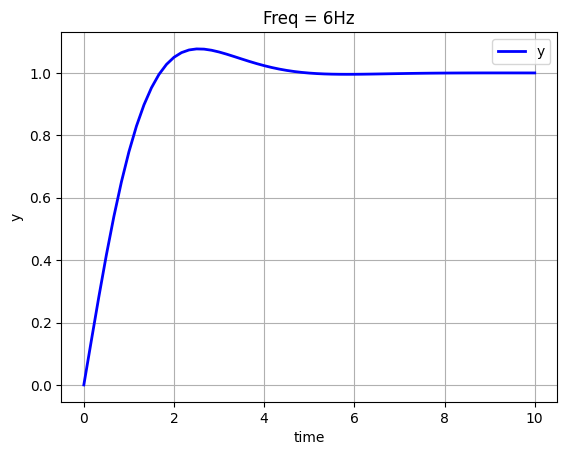
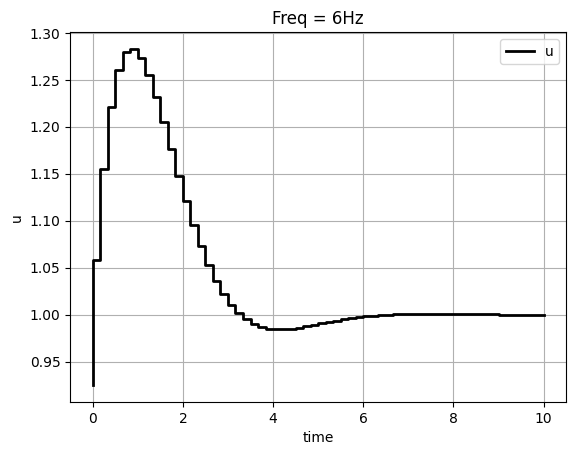


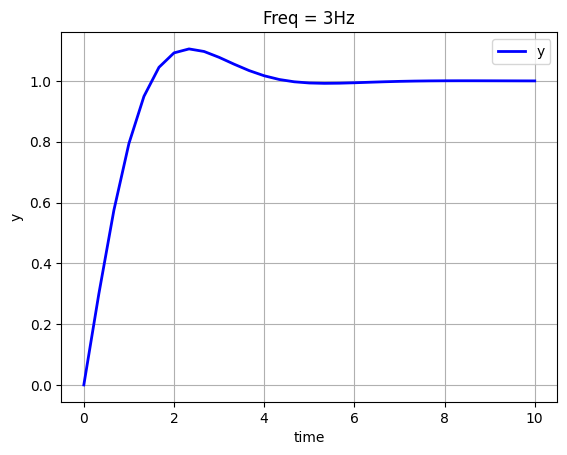
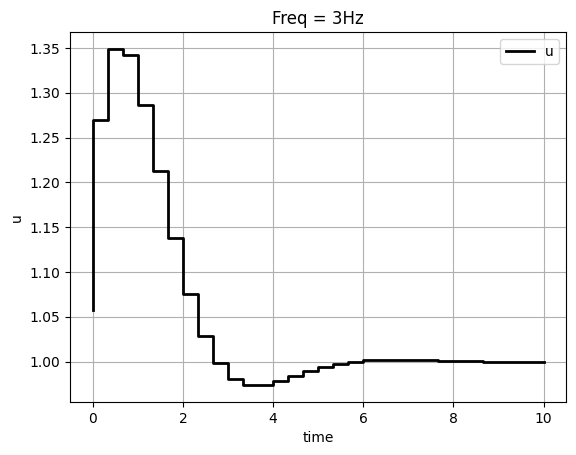

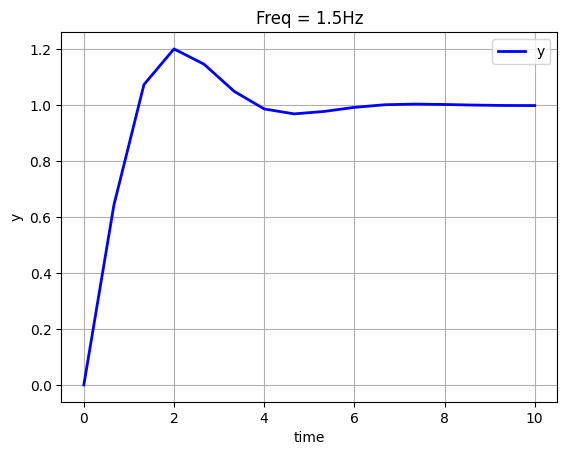
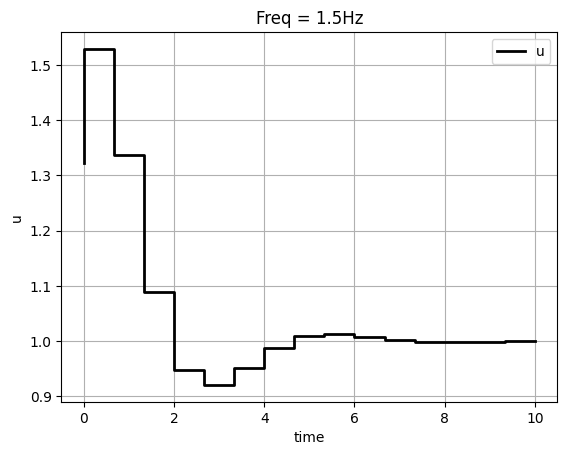

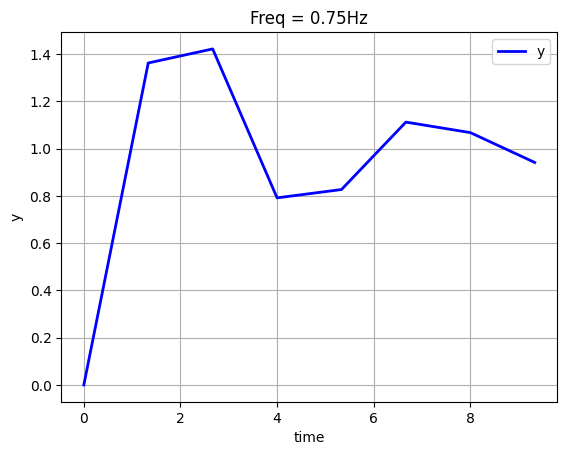
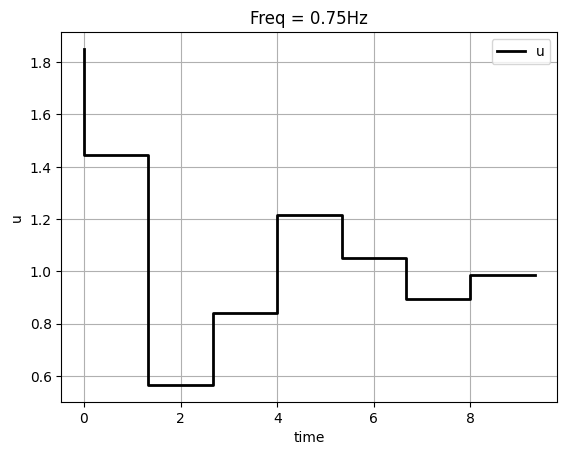

  
b-) Compare os resultados com os da seção anterior.

**Resposta:**

----------------------------------------------------
Funcao de transferencia do sistema em tempo continuo
G =  <TransferFunction>: sys[450]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1
-----
s + 1

----------------------------------------------------
Funcao de transferencia do sistema em tempo discreto
Gd =  <TransferFunction>: sys[450]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.7364
----------
z - 0.2636

dt = 1.3333333333333333

-----------------------------------
coeficientes da funcao de transferencia discreta
b1 =  0.7364
a1 =  -0.2636
------------------------------------
Funcao de transferencia do controlador
Hd =  <TransferFunction>: sys[452]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.851 z + 0.2644
----------------
     z - 1

dt = 1.3333333333333333

------------------------------------
polos e zeros de malha aberta
zeros
[-0.14285714+0.j]
polos
[1.        +0.j 0.26359714+0.j]
------------------------------------
Funcao de transferencia em malha fechada
G

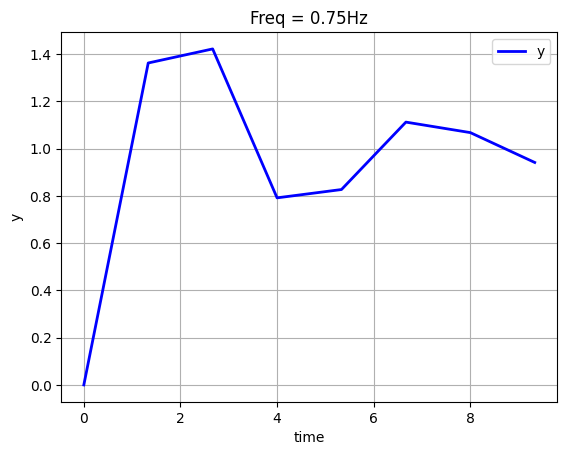

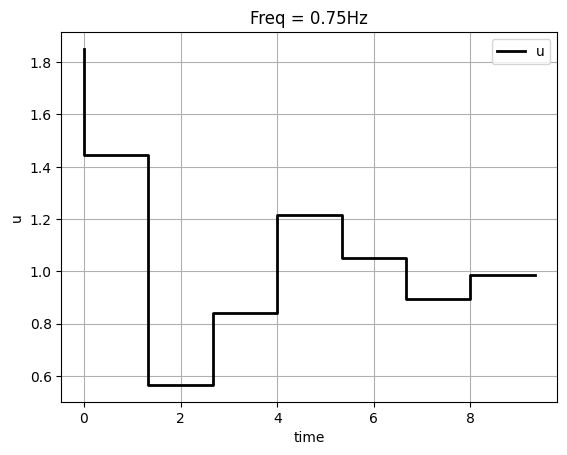

In [48]:
#%matplotlib qt
%matplotlib inline
import numpy as np
import control as co_general
import matplotlib.pyplot as plt
import control.matlab as co
#
# G(s) =    K
#        ---------
#         Tau s+1
K   = 1.0
Tau = 1.0
# Escolha a frequencia de amostragem
fc =  0.75                         # <------------------------------------------- fc
T = 1/fc
#
s = co.tf('s');
G = K/(Tau*s+1)
print('----------------------------------------------------')
print('Funcao de transferencia do sistema em tempo continuo')
print('G = ',G)
# Conversao da funcao de transferencia de s para z
# considerando um segurador de ordem-zero
print('----------------------------------------------------')
print('Funcao de transferencia do sistema em tempo discreto')
Gd = co.c2d(G,T,'zoh')
print('Gd = ',Gd)
# Extraindo os coeficientes da funcao de transferencia discreta
[num,den] = co.tfdata(Gd)
# ha aqui um array dentro de uma lista
# os coeficentes sao extraidos com 4 casas decimais
#             b1
# Gd(z) =  ------
#           z + a1
b1 = round(num[0][0][0],4)
a1 = round(den[0][0][1],4)
print('-----------------------------------')
print('coeficientes da funcao de transferencia discreta')
print('b1 = ',b1)
print('a1 = ',a1)
#
# H(s) = Kp (1 + 1/Ti*s)
# o controlador em tempo dsicreto pelo Metodo Tustin
# e' obtido fazendo:
#
#   s =  2   (z-1)
#       --- -------
#        T   (z+1)
# Definicao do controlador PI em tempo discreto
#
# Hd(z) = (T*Kp + 2*Ti*Kp )z (T*Kp - 2*Ti*Kp)
#         -----------------------------------
#                    2*Ti*z - 2*Ti
#
# partindo dos polos escolhidos p1, p2
# e' possivel calcular os parametros K e beta do
# controlador PI
# voce pode fazer os calculos aqui
Kp = 0.7931                       # <--------------------------------- Kp
Ti =  0.5                             # <--------------------------------- Ti
#
Hd = co.tf([T*Kp+2*Ti*Kp, T*Kp-2*Ti*Kp],[2*Ti,-2*Ti],T)
print('------------------------------------')
print('Funcao de transferencia do controlador')
print('Hd = ',Hd)
#
# Polos e zeros de malha aberta
#
print('------------------------------------')
print('polos e zeros de malha aberta')
print('zeros')
print(co.zero(Gd*Hd))
print('polos')
print(co.pole(Gd*Hd))
#
# Sistema de controle em malha fechada
#
cloop = co.feedback(Gd*Hd,1)
print('------------------------------------')
print('Funcao de transferencia em malha fechada')
print('Gd*Hd/ (1+Gd*Hd)= ',cloop)
#
# Polos e zeros de malha fechada
#
print('------------------------------------')
print('polos e zeros de malha fechada')
print('zeros')
print(co.zero(cloop))
print('polos')
print(co.pole(cloop))
print('COEF. DE AMORTECIMENTO E FREQ. NATURAL')
print('_____Polos____________zeta_______omegan')
co.damp(cloop)
# Esse comando nao parece funcionar em tempo discreto
#sinfo = co.stepinfo(cloop)
#print('-------------')
#print('CARACTERISTICAS DA RESPOSTA TRANSITORIA DO SISTEMA cloop')
#print('tempo de subida tr = ','%.2f' % sinfo['RiseTime'],'seg')
#print('tempo de acomodacao ts = ','%.2f' % sinfo['SettlingTime'],'seg')
#print('maximo sobresinal Mp = ',sinfo['Overshoot'])
#print('valor de pico y = ','%.2f' % sinfo['Peak'])
#print('instante de pico tp = ','%.2f' % sinfo['PeakTime'],'seg')
#print('valor de regime estacionario omegass = ','%.2f' % sinfo['SteadyStateValue'])
#
# geracao do vetor de tempo onde o passo é igual
# a T e tempo final igual a tf (definido em celula anterior)
nintervalos = tf/T
nintervalos = int(nintervalos)
t=[x*T for x in range(0,nintervalos+1)]
y,t = co.step(cloop,t)
# Funcao de transferencia do esforco de controle
esforco = co.feedback(Hd,Gd)
# resposta a degrau do esforco de controle
u,t = co.step(esforco,t)
# Utilizaremos um grafico do tipo step
# Saida y e esforco de controle u
# saida y(t)
plt.plot(t,y,'b-',linewidth=2,label='y')
plt.title("Freq = " + str(fc) +"Hz" )
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
# sinal de controle u(t)
plt.step(t,u,'k-',linewidth=2,label='u')
plt.title("Freq = " + str(fc) +"Hz" )
plt.xlabel('time')
plt.ylabel('u')
plt.legend()
plt.grid()
plt.show()

## 4. Controle de um sistema eletrônico de 1a. ordem

Utilizaremos aqui como planta um filtro ativo passa baixas de 1a. ordem, na figura abaixo ilustramos o diagrama esquemático do circuito eletrônico  em conjunto com o seu diagrama de Bode.

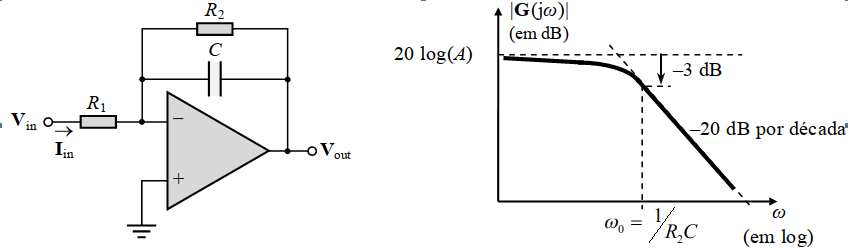

A função de transferẽncia desse sistema pode ser escrita como:
$$
G(s) = \frac{A}{\tau s +1},
$$
onde o ganho é dado por $A = R_2/R_1$ e constante de tempo $\tau=R_2 C$.

Para uma entrada degrau de amplitude $D$ obtemos uma resposta com uma caracteristica expoencial:
$$
v_{out}(t)=AD(1-\exp^{-t/\tau})
$$
No instante $t=\tau$ obtemos $v_{out}(\tau)=0,63AD$. Para
$t=4\tau$ obtemos $v_{out}(\tau)=0,98AD$.
Em regime estático $v_{out}(\infty)=AD$. Veja figura abaixo.

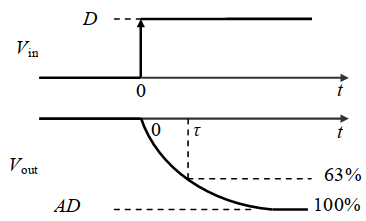

O Diagrama esquemático do circuito eletrônico efetivamente utilizado é ilustrado abaixo. Note que
ao invés de somente o resistor $R_2$ temos um potenciômetro $P_1$ ou seja o ganho nesse caso é dado
por:
$$
A = \frac{R_2+P_1}{R_1},
$$
e a constante de tempo:
$$
\tau = (R_2+P_1)C.
$$

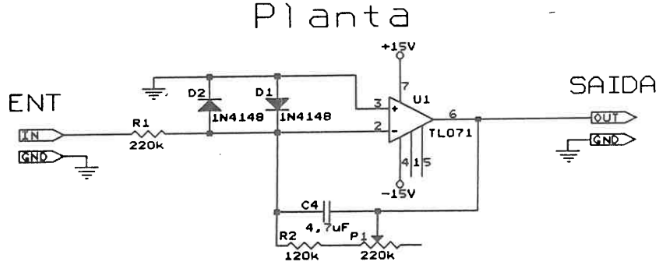

A placa eletrônica é ilustrada abaixo. Existem 3 circuitos diferentes nessa placa. Utilizaremos somente o da parte mais inferior da placa.

**NÃO MEXA NO POTENCIÔMETRO**
O potenciômetro já se encontra sintonizado de tal forma que $A\approx 1.0$ e $\tau\approx 1.0$  

Todos os cabeamentos necessários devem estar prontos para utilização. 

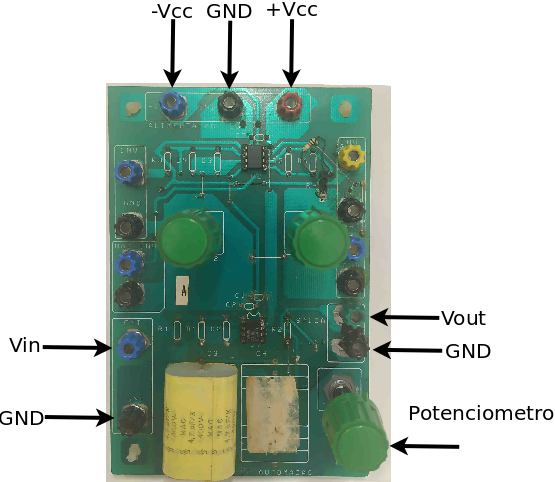

a-) Nesse ítem será utilizado o script de Matlab contido no arquivo ControladorPIAmpOpV1.m. O script implementa um controlador PI discretizado através do método de transformação bilinear (método de integração trapezoidal). É feito a leitura da saída do filtro (vout) através da placa de aquisição de sinais, o controlador PI é executado e o valor da ação de controle $u_k$ é colocado na entrada do filtro (vin).
Realize experimentos com redução gradativa da frequência de amostragem
$f_c$ (Ex: $15Hz$,$5Hz$, $1Hz$) e analise a degradação de desempenho do sistema.

**Resposta:**
  
  **<inserir aqui imagem dos gráficos de y(t) e u(t) para cada frequencia fc>**
  
b-) Compare os resultados com os da seção anterior.

**Resposta:**

## 5. Discussões

**Resposta:**

## 6. Conclusões

**Resposta:**